In [1]:
#Firstly import requests library
import requests

In [2]:
news_about = "Russia"
your_API_key = "af0ed6ab303c478d9b9f24358421e79d"
from_date = "2021-07-12" # yyyy.mm.dd to start searching till now 

In [3]:
params = {'q': news_about,
         'apiKey': your_API_key,
         'from': from_date,
         'sortBy': 'publishedAt',
         'language': 'en',
         'to': '2021-08-09',
         'pageSize': 100}

# pageSize = 100 - max for unpaid account

In [4]:
# do "get" method to google.API

response = requests.get('https://newsapi.org/v2/everything', params = params)

In [5]:
response.headers['Content-Type']

'application/json; charset=utf-8'

In [6]:
# have a look over response 
response.json()

{'status': 'ok',
 'totalResults': 17288,
 'articles': [{'source': {'id': None, 'name': 'Mercola.com'},
   'author': 'communities@mercola.com (Dr. Joseph Mercola)',
   'title': 'COVID Vaccine Mandates Strongly Opposed in Europe, US as Failures Increase',
   'description': "Since coronavirus pandemic lockdowns were implemented by many governments in 2020, people around the world have held largely peaceful protests against unprecedented social distancing restrictions that are devastating global economies and ruining people's live…",
   'url': 'https://articles.mercola.com/sites/articles/archive/2021/08/10/covid-vaccine-mandates-strongly-opposed-in-europe.aspx',
   'urlToImage': 'https://media.mercola.com/ImageServer/Public/2021/August/FB/covid-vaccine-mandates-strongly-opposed-in-europe-fb.jpg',
   'publishedAt': '2021-08-10T00:00:00Z',
   'content': 'Disclaimer: The entire contents of this website are based upon the opinions of Dr. Mercola, unless otherwise noted. Individual articles are

As we can see the "url" placed in "articles" dict. Let's take all url's

In [7]:
response_json = response.json()

In [8]:
url_list = [dict_obj['url'] for dict_obj in response_json['articles']]

In [9]:
url_list

['https://articles.mercola.com/sites/articles/archive/2021/08/10/covid-vaccine-mandates-strongly-opposed-in-europe.aspx',
 'https://www.bitpipe.com/detail/RES/1628253930_572.html',
 'https://elifesciences.org/articles/72048',
 'https://hollywoodlife.com/2021/08/09/tatyana-mcfadden-blood-clot-paralympics-interview/',
 'https://www.fox5atlanta.com/news/covid-19-boosters-some-in-us-getting-extra-shot-without-fda-approval',
 'https://www.bbc.co.uk/news/world-europe-58152324',
 'https://punchng.com/afghan-turmoil-taliban-are-sole-gainers-of-doha-pact/',
 'https://themarketwriteup.com/cyber-security-in-robotic-market-is-booming-worldwide-with-mcafee-tuv-rheinland-beyond-security/',
 'https://oilprice.com/Energy/Natural-Gas/Cheap-Natural-Gas-Is-A-Thing-Of-The-Past.html',
 'https://www.nytimes.com/2021/08/09/world/europe/belarus-Lukashenko-blames-West.html',
 'https://indianexpress.com/article/india/in-message-to-china-pm-modi-calls-for-rules-based-resolution-to-sea-disputes-7446309/',
 'https

In [10]:
len(url_list)

100

As it was in task: 'download all articles from google news about our subject (Russia)', 
I will do requests and scratch text of articles. But firstly, will check broken URLs.

In [11]:
for n, url in enumerate(url_list):
    response = requests.get(url)
    if not response:
        print(f'{url} is broken')
        url_list.pop(n)
print('\n', f'We have {len(url_list)} good urls')

https://articles.mercola.com/sites/articles/archive/2021/08/10/covid-vaccine-mandates-strongly-opposed-in-europe.aspx is broken
https://www.seattlepi.com/news/article/UK-vows-maximum-attendance-at-COP-26-summit-as-16375312.php is broken
https://www.mirror.co.uk/news/uk-news/record-breaking-ice-queen-nhs-24723746 is broken
https://www.sciencedaily.com/releases/2021/08/210809162739.htm is broken
https://nationalinterest.org/blog/buzz/eastern-europe-can-overcome-nord-stream-2-challenge-191500 is broken
https://nationalinterest.org/blog/buzz/eu-will-bear-consequences-germanys-nord-stream-2-decision-191498 is broken
https://www.mirror.co.uk/news/uk-news/uk-ploughs-95million-space-wars-24723526 is broken
https://www.business2community.com/cybersecurity/enterprise-iot-security-practices-checklist-that-you-need-to-follow-02424403 is broken
https://www.investors.com/research/demand-for-access-to-stock-exchanges-in-russia-central-asia-powers-freedom-holdings-ethereal-advance/ is broken
https://p

Further I will scratch all texts from these links with Beautiful Soup library. And create 1 huge string with texts from all articles

In [12]:
from bs4 import BeautifulSoup

In [13]:
def scratch(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    text_of_article = soup.select('p')     #select 'p' scratch only text of article
    clear_text = ' '.join([raw_data.get_text() for raw_data in text_of_article])
    return clear_text

In [14]:
print(scratch(url_list[0]))

In this week’s Computer Weekly, we examine the emerging applications of real-time analytics and highlight the challenges for businesses to maximise the benefits. EU experts are calling for reform of US surveillance laws to ease transatlantic data protection – we look at the issues. And we talk to the co-CEO of HR software giant Workday. Read the issue now. You forgot to provide an Email Address. This email address doesn’t appear to be valid. Please provide a Corporate Email Address. This email address is already registered. Please log in. You forgot to provide your first name. You forgot to provide your last name. You forgot to provide a company name. You forgot to provide a job title. You forgot to select your seniority. You forgot to select your job function. You did not select the number of employees at your company. You did not select which industry you are in. You did not select which industry you are in. You did not provide a full local address. You did not provide a full local a

In [15]:
huge_str = ' '.join([scratch(url) for url in url_list])

In [16]:
len(huge_str) # this is full text from all urls

795060

In [17]:
huge_str[:200]

'In this week’s Computer Weekly, we examine the emerging applications of real-time analytics and highlight the challenges for businesses to maximise the benefits. EU experts are calling for reform of U'

PREPARATION FOR TOKENIZING

In [18]:
text = huge_str.lower()

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Add some specific chars to punctuation

In [19]:
punct = string.punctuation + '’“”–'

In [20]:
# delete punctuations

text_without_punct = "".join([ch for ch in text if ch not in punct])

In [21]:
len(text), len(text_without_punct)

(795060, 770877)

Import NLP libraries

In [22]:
# !pip install nltl    #if you don't install this library before

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [27]:
# stopwords
eng_stopwords = stopwords.words("english")
eng_stopwords.extend(['-', 'us'])
print(eng_stopwords, len(eng_stopwords), sep='\n')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
text_tokens = word_tokenize(text_without_punct)

In [29]:
print(f'{len(text_tokens)} words we have in our text') 

124180 words we have in our text


In [30]:
text = nltk.Text(text_tokens)
print(type(text))

<class 'nltk.text.Text'>


In [31]:
text

<Text: in this weeks computer weekly we examine the...>

In [32]:
fdist = FreqDist(text)

In [33]:
fdist.most_common(20)

[('the', 7138),
 ('of', 3428),
 ('and', 3330),
 ('to', 3326),
 ('in', 2679),
 ('a', 2327),
 ('that', 1315),
 ('is', 1211),
 ('for', 1166),
 ('on', 1068),
 ('as', 836),
 ('with', 764),
 ('it', 704),
 ('by', 699),
 ('are', 644),
 ('from', 628),
 ('at', 589),
 ('have', 572),
 ('this', 522),
 ('be', 517)]

In [34]:
print(f'{len(fdist)} unique words in our data')

13663 unique words in our data


In [35]:
# drop stopwords
text_tokens = [token.strip() for token in text_tokens if token not in eng_stopwords]

In [36]:
print(f'{len(text_tokens)} words we have in our text without stop words')

76191 words we have in our text without stop words


In [37]:
text_drop_stopwords = nltk.Text(text_tokens)
text_drop_stopwords

<Text: weeks computer weekly examine emerging applications realtime analytics...>

In [39]:
fdist_dsw = FreqDist(text_drop_stopwords)
fdist_dsw.most_common(30)

[('said', 386),
 ('also', 323),
 ('—', 314),
 ('new', 299),
 ('taliban', 261),
 ('china', 252),
 ('would', 217),
 ('one', 211),
 ('2021', 209),
 ('people', 204),
 ('russia', 189),
 ('could', 183),
 ('even', 169),
 ('market', 167),
 ('2020', 163),
 ('first', 161),
 ('million', 157),
 ('last', 156),
 ('may', 153),
 ('year', 153),
 ('global', 148),
 ('north', 147),
 ('per', 147),
 ('united', 134),
 ('like', 133),
 ('net', 133),
 ('margin', 133),
 ('security', 132),
 ('get', 128),
 ('gross', 127)]

Let's do a Word Cloud. I will use "wordcloud" library

In [40]:
# !pip install wordcloud    # uncomment, if you haven't installed it before

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
plain_text = " ".join(text_drop_stopwords)

In [42]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(plain_text)

# And show it!

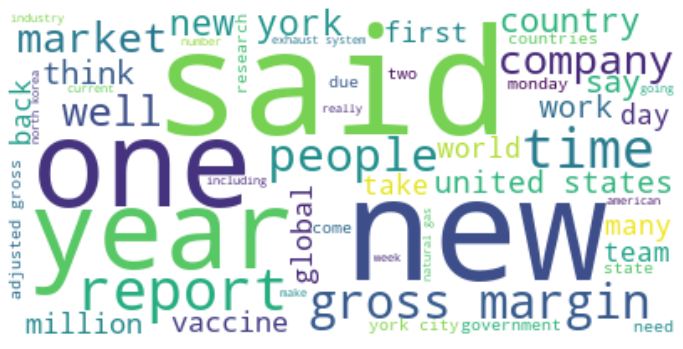

In [43]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
wordcloud.to_file("word_cloud.png")